<a href="https://colab.research.google.com/github/kiran2424/Netflix-Movies-and-TV-Shows-Clustering/blob/main/NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Netflix Movies and TV Shows Clustering - Kiran Mamtani/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

In [7]:
data.shape

(7787, 12)

In [8]:
data.head(7)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ..."


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [10]:
data.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

EDA

Movie      5377
TV Show    2410
Name: type, dtype: int64


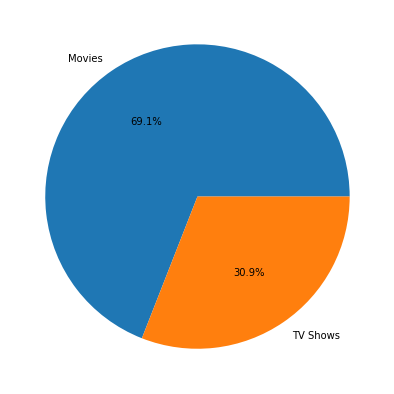

In [11]:
type=data['type'].value_counts()
print(type)
fig = plt.figure(figsize=(10, 7))
plt.pie(type,labels=['Movies','TV Shows'],autopct='%1.1f%%')
plt.show()

In [12]:
data.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

4 columns with null values


Now we cant predict or replace the date added value in column and the null value rows is less in numbers i.e 10 

In [32]:
data.dropna(subset=['date_added'],inplace=True)

In [14]:
data.shape

(7777, 12)

rating has only 7 so will replace it with TV-MA (Which is highest in number) and it will effect our results

In [33]:
data['rating'].fillna('TV-MA',inplace=True)

In [16]:
data['rating'].shape

(7777,)

The other three columns who have null value will replace it as below

In [34]:
data['director'].fillna('No Director', inplace=True)
data['cast'].fillna('No Cast', inplace=True)
data['country'].fillna('Country Unavailable', inplace=True)

In [18]:
data.shape

(7777, 12)

Lets check again for null value

In [19]:
data.isnull().any()

show_id         False
type            False
title           False
director        False
cast            False
country         False
date_added      False
release_year    False
rating          False
duration        False
listed_in       False
description     False
dtype: bool

no null values....

TV-MA       2868
TV-14       1928
TV-PG        804
R            665
PG-13        386
TV-Y         279
TV-Y7        270
PG           247
TV-G         194
NR            83
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: rating, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


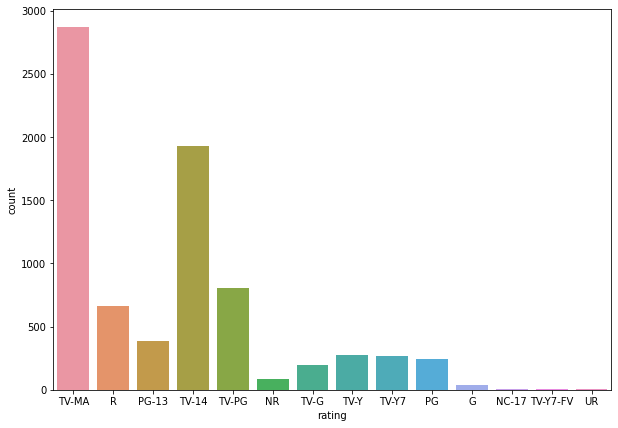

In [20]:
rating=data['rating'].value_counts()
print(rating)
fig = plt.figure(figsize=(10,7))
sns.countplot(data['rating'])
plt.show()

Lets see rating of movies and TV shows differently

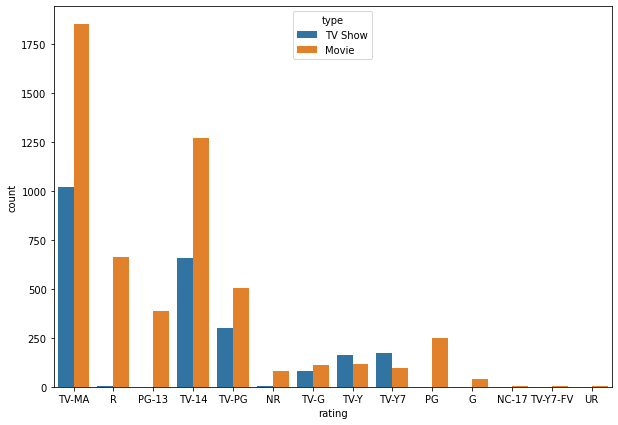

In [21]:
plt.figure(figsize=(10,7))
sns.countplot(x='rating', hue = 'type', data=data)
plt.show()

Country

Based on total numbers of movies on Netflix

(121,)


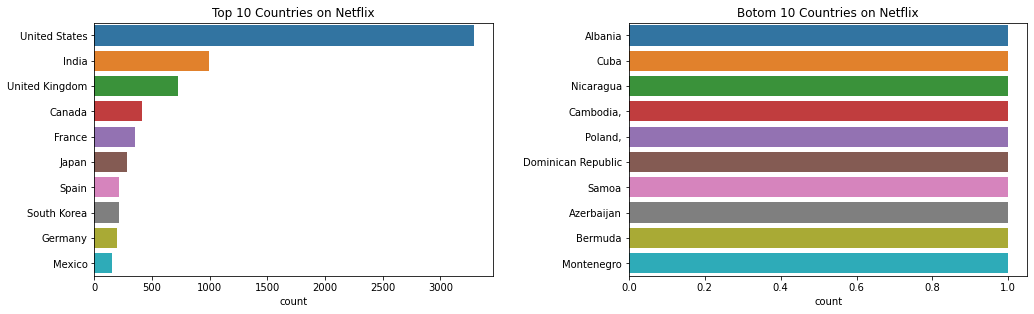

In [22]:
filtered_countries = data.set_index('title').country.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);
filtered_countries = filtered_countries[filtered_countries != 'Country Unavailable']
plt.rcParams['figure.figsize'] = (15, 5)
print(filtered_countries.value_counts().shape)
fig, axes = plt.subplots(1, 2)
sns.countplot(y = filtered_countries, order=filtered_countries.value_counts().index[:10], ax=axes[0])
sns.countplot(y = filtered_countries, order=filtered_countries.value_counts().index[111:], ax=axes[1])
axes[0].set_title('Top 10 Countries on Netflix')
axes[1].set_title('Botom 10 Countries on Netflix')
fig.tight_layout(pad=3.0)
plt.show()

Based on ratings of movies on Netflix

(42,)


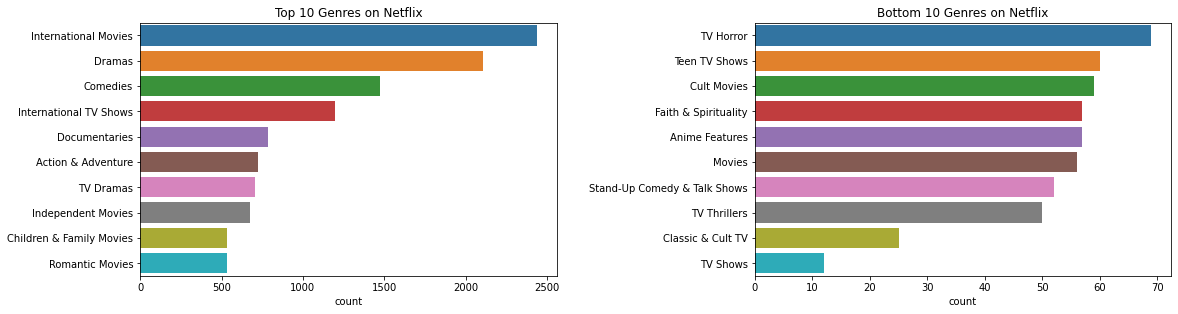

In [23]:
filtered_genres = data.set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
print(filtered_genres.value_counts().shape)
plt.rcParams['figure.figsize'] = (17, 5)
fig, axes = plt.subplots(1, 2)
sns.countplot(y = filtered_genres, order=filtered_genres.value_counts().index[:10], ax=axes[0])
sns.countplot(y = filtered_genres, order=filtered_genres.value_counts().index[32:], ax=axes[1])
axes[0].set_title('Top 10 Genres on Netflix')
axes[1].set_title('Bottom 10 Genres on Netflix')
fig.tight_layout(pad=3.0)
plt.show()

(4478,)


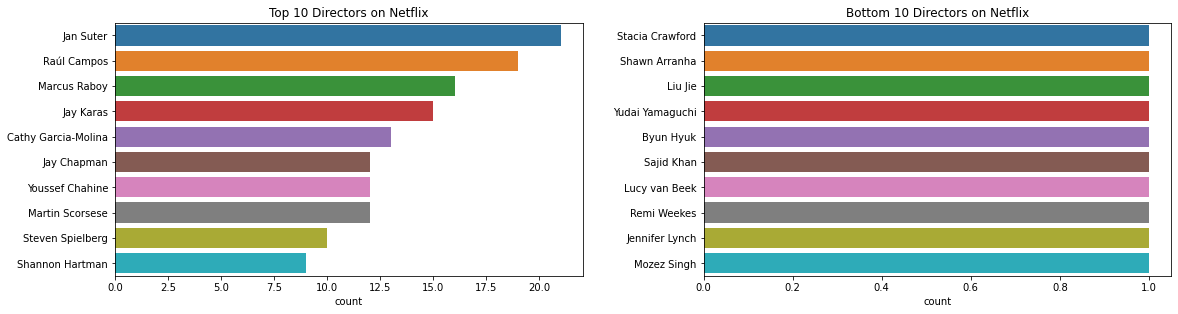

In [24]:
filtered_directors = data[data.director != 'No Director'].set_index('title').director.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
print(filtered_directors.value_counts().shape)
plt.rcParams['figure.figsize'] = (17, 5)
fig, axes = plt.subplots(1, 2)
sns.countplot(y = filtered_directors, order=filtered_directors.value_counts().index[:10], ax=axes[0])
sns.countplot(y = filtered_directors, order=filtered_directors.value_counts().index[4468:], ax=axes[1])
axes[0].set_title('Top 10 Directors on Netflix')
axes[1].set_title('Bottom 10 Directors on Netflix')
fig.tight_layout(pad=3.0)
plt.show()

(32847,)


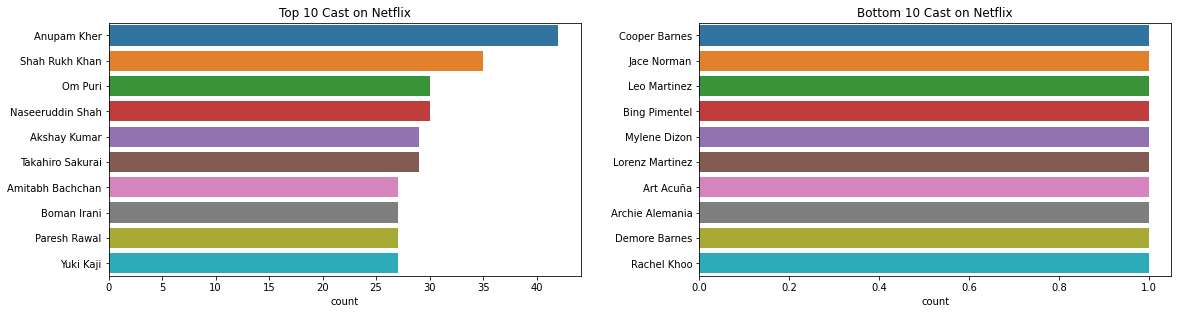

In [25]:
filtered_cast = data[data.cast != 'No Cast'].set_index('title').cast.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
print(filtered_cast.value_counts().shape)
plt.rcParams['figure.figsize'] = (17, 5)
fig, axes = plt.subplots(1, 2)
sns.countplot(y = filtered_cast, order=filtered_cast.value_counts().index[:10], ax=axes[0])
sns.countplot(y = filtered_cast, order=filtered_cast.value_counts().index[32837:], ax=axes[1])
axes[0].set_title('Top 10 Cast on Netflix')
axes[1].set_title('Bottom 10 Cast on Netflix')
fig.tight_layout(pad=3.0)
plt.show()

In [35]:
data['added_day']=pd.DatetimeIndex(data['date_added']).day
data['added_month']=pd.DatetimeIndex(data['date_added']).month
data['added_year']=pd.DatetimeIndex(data['date_added']).year

In [27]:
data.shape

(7777, 15)

12    833
10    785
1     757
11    738
3     669
9     619
8     618
4     601
7     600
5     543
6     542
2     472
Name: added_month, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


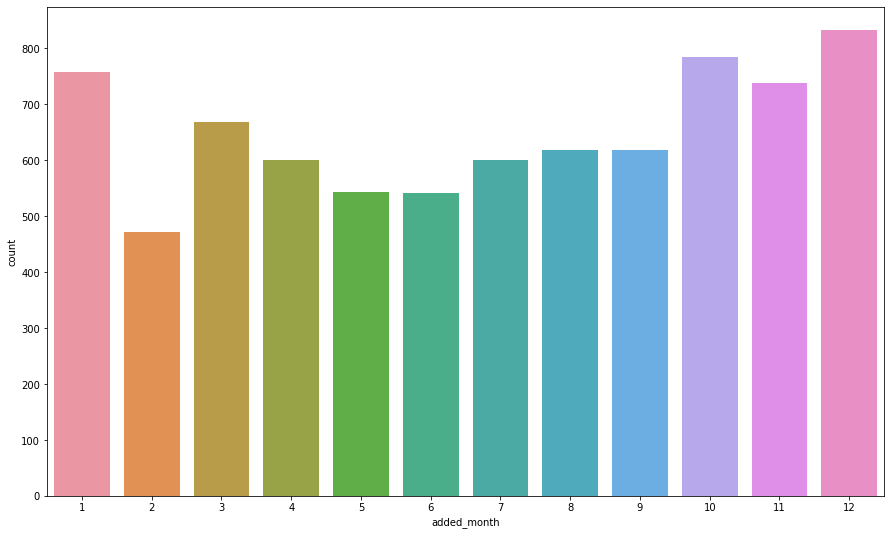

In [28]:
added_month=data['added_month'].value_counts()
print(added_month)
fig = plt.figure(figsize=(15,9))
sns.countplot(data['added_month'])
plt.show()

2019    2153
2020    2009
2018    1685
2017    1225
2016     443
2021     117
2015      88
2014      25
2011      13
2013      11
2012       3
2008       2
2009       2
2010       1
Name: added_year, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


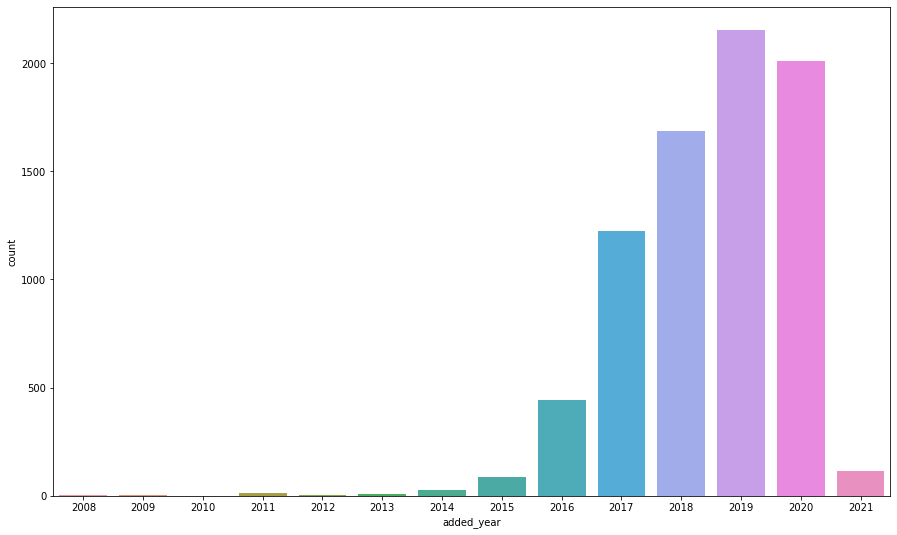

In [29]:
added_year=data['added_year'].value_counts()
print(added_year)
fig = plt.figure(figsize=(15,9))
sns.countplot(data['added_year'])
plt.show()

Lets see differently for TV shows and movies. Since in our data we have very less numbers of year 2021 means not covered whole year 

lets remove 2021

In [30]:
netflix_year = data[['type','added_year']]
movie_year = netflix_year[netflix_year['type']=='Movie'].added_year.value_counts().to_frame().reset_index()
movie_year = movie_year[movie_year != 2021]
show_year = netflix_year[netflix_year['type']=='TV Show'].added_year.value_counts().to_frame().reset_index()
show_year = show_year[show_year != 2021]

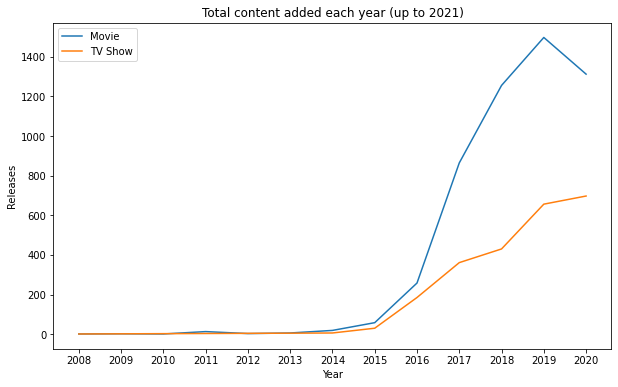

In [31]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(data=movie_year, x='index',y='added_year')
sns.lineplot(data=show_year, x='index',y='added_year')

ax.set_xticks(np.arange(2008, 2021, 1))
plt.title("Total content added each year (up to 2021)")
plt.legend(['Movie','TV Show'])
plt.ylabel("Releases")
plt.xlabel("Year")
plt.show()

Now we will look into the duration of Netflix films. Since movies are measured in time and shows are measured by seasons, we need to split the dataset between movies and TV shows. 

In [32]:
netflix_content = data[['type','duration']]
netflix_movies = netflix_content[netflix_content['type']=='Movie'].duration.str.replace(' min','').astype(int)
netflix_tvshows = netflix_content[netflix_content['type']=='TV Show'].rename(columns={'duration':'seasons'}).replace({'seasons':{'1 Season':'1 Seasons'}}).seasons.str.replace(' Seasons','').astype(int)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


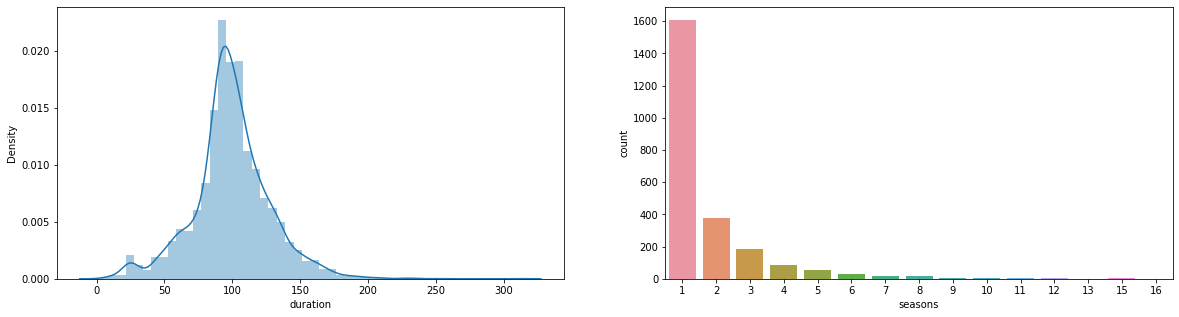

In [33]:
plt.rcParams['figure.figsize'] = (20, 5)
fig, axes = plt.subplots(1, 2)
sns.distplot(netflix_movies,ax=axes[0])
sns.countplot(netflix_tvshows,ax=axes[1])
plt.show()

Above on the left, we can see that the duration for Netflix movies closely resembles a normal distribution with the average viewing time spanning about 90 minutes which seems to make sense. Netflix TV shows on the other hand seems to be heavily skewed to the right where the majority of shows only have 1 season.

In [39]:
mlb = MultiLabelBinarizer()
mlb_data = data.join(pd.DataFrame(mlb.fit_transform(data.pop('listed_in')),columns=mlb.classes_ ,index=data.index))

In [40]:
one_hot_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
r=data['rating'].unique()
print(r)
one_hot_rating = pd.DataFrame(one_hot_encoder.fit_transform(mlb_data[['rating']]),columns=data['rating'].unique())

one_hot_rating.index = mlb_data.index
mlb_data_1 = mlb_data.join(one_hot_rating, lsuffix='_left', rsuffix='_right')

['TV-MA' 'R' 'PG-13' 'TV-14' 'TV-PG' 'NR' 'TV-G' 'TV-Y' 'TV-Y7' 'PG' 'G'
 'NC-17' 'TV-Y7-FV' 'UR']


In [41]:
!pip install category_encoders


In [52]:
import category_encoders as ce

count_encoder = ce.CountEncoder()

# Count encode director, cast, and country columns
count_encoded = count_encoder.fit_transform(mlb_data[['director','cast','country']],columns=data['rating'].unique())

# Rename the columns with the _count suffix, and join to dataframe
netflix_encoded_data = mlb_data.join(count_encoded.add_suffix("_count"))


In [53]:
netflix_encoded_data = netflix_encoded_data.drop(['show_id','date_added','release_year','duration','added_day',	'added_month','added_year','type','title','director','cast','country','rating','description'], axis=1)
netflix_encoded_data.head()


,,&,',",",-,A,B,C,D,F,...,r,s,t,u,v,w,y,director_count,cast_count,country_count
0,1,1,0,1,1,0,0,0,1,1,...,1,1,1,0,0,1,1,2379,1,72
1,1,0,0,1,0,0,0,0,1,0,...,1,1,1,0,1,0,0,1,1,100
2,1,0,0,1,0,0,0,0,0,0,...,1,1,1,0,1,0,0,1,1,23
3,1,1,0,1,1,1,0,0,0,1,...,1,1,1,1,1,0,1,1,1,2549
4,0,0,0,0,0,0,0,0,1,0,...,1,1,0,0,0,0,0,4,1,2549


NLP

In [32]:
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import matplotlib
%config InlineBackend.figure_format = 'retina'

Apply the function to each examples

In [33]:
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    # replacing the punctuations with no space, 
    # which in effect deletes the punctuation marks 
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

In [36]:
data['description'] = data['description'].apply(remove_punctuation)

Removing stopwords

In [38]:
import nltk
nltk.download('stopwords')
sw = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [39]:
def stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    # joining the list of words with space separator
    return " ".join(text)

In [40]:
data['description'] = data['description'].apply(stopwords)

----------------------------------------------------------------

In [41]:
data_1=data.copy()

Categorical Encoding